## Learning Objectives 

* Develop a function: if a block of code will be re-used several times, develop it as a function to avoid coding errors.
* ROC/AUC
* VARImp
* Train and test your model with a small dataset.
* Model with the entire dataset when there is no error.
* Keep your notebook clean and readable.
* Random forest
* Gradient boosting

### Load the data

In [204]:
import numpy as np
import datetime
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [205]:
data = pd.read_csv("XYZloan_default_selected_vars.csv")

In [206]:
data.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

In [207]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 87 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            80000 non-null  int64  
 1   loan_default  80000 non-null  int64  
 2   AP001         80000 non-null  int64  
 3   AP002         80000 non-null  int64  
 4   AP003         80000 non-null  int64  
 5   AP004         80000 non-null  int64  
 6   AP005         80000 non-null  object 
 7   AP006         80000 non-null  object 
 8   AP007         80000 non-null  int64  
 9   AP008         80000 non-null  int64  
 10  AP009         80000 non-null  int64  
 11  TD001         80000 non-null  int64  
 12  TD002         80000 non-null  int64  
 13  TD005         80000 non-null  int64  
 14  TD006         80000 non-null  int64  
 15  TD009         80000 non-null  int64  
 16  TD010         80000 non-null  int64  
 17  TD013         80000 non-null  int64  
 18  TD014         80000 non-nu

In [208]:
data.describe()

,id,loan_default,AP001,AP002,AP003,AP004,AP007,AP008,AP009,TD001,...,CD160,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB005
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.00000,80000.000000,80000.000000,80000.000000,...,79619.000000,79619.000000,79619.000000,79619.000000,79619.000000,79619.000000,79619.00000,79619.000000,79619.000000,77207.000000
mean,40000.500000,0.193600,31.706913,1.321813,2.014925,11.235413,3.30130,3.117200,0.727925,1.986962,...,6.911956,14.271694,11.773358,909.089313,810.786219,1732.693314,1539.33443,2513.226491,2229.606137,5.976272
std,23094.155105,0.395121,7.075070,0.467174,1.196806,2.212313,1.33655,1.306335,0.445031,1.807445,...,28.007499,38.235012,33.270641,1379.553332,1245.044602,2441.503517,2172.71384,3404.975112,3005.615048,3.641814
min,1.000000,0.000000,20.000000,1.000000,1.000000,3.000000,1.00000,1.000000,0.000000,0.000000,...,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.00000,-99.000000,-99.000000,0.000000
25%,20000.750000,0.000000,27.000000,1.000000,1.000000,12.000000,2.00000,2.000000,0.000000,1.000000,...,2.000000,5.000000,4.000000,84.000000,34.000000,309.000000,226.00000,539.000000,414.000000,3.000000
50%,40000.500000,0.000000,30.000000,1.000000,1.000000,12.000000,3.00000,3.000000,1.000000,2.000000,...,7.000000,12.000000,10.000000,475.000000,397.000000,1023.000000,870.00000,1553.000000,1324.000000,5.000000
75%,60000.250000,0.000000,35.000000,2.000000,3.000000,12.000000,5.00000,4.000000,1.000000,3.000000,...,14.000000,23.000000,20.000000,1209.000000,1080.000000,2287.000000,2030.00000,3296.000000,2936.000000,8.000000
max,80000.000000,1.000000,56.000000,2.000000,6.000000,12.000000,5.00000,5.000000,1.000000,20.000000,...,1061.000000,2792.000000,1579.000000,48585.000000,29664.000000,88364.000000,54651.00000,125352.000000,87312.000000,47.000000


In [209]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(
     data, test_size=0.40, random_state=42)

In [210]:
train.shape

(48000, 87)

In [211]:
test.shape

(32000, 87)

In [212]:
var = pd.DataFrame(train.dtypes)
var.head(10)

,0
id,int64
loan_default,int64
AP001,int64
AP002,int64
AP003,int64
AP004,int64
AP005,object
AP006,object
AP007,int64
AP008,int64


In [213]:
var = pd.DataFrame(train.dtypes).reset_index()
var.head()

,index,0
0,id,int64
1,loan_default,int64
2,AP001,int64
3,AP002,int64
4,AP003,int64


In [214]:
var.columns = ['varname','dtype'] 
var.head(10)

,varname,dtype
0,id,int64
1,loan_default,int64
2,AP001,int64
3,AP002,int64
4,AP003,int64
5,AP004,int64
6,AP005,object
7,AP006,object
8,AP007,int64
9,AP008,int64


In [215]:
var['source'] = var['varname'].str[:2]
var.head()

,varname,dtype,source
0,id,int64,id
1,loan_default,int64,lo
2,AP001,int64,AP
3,AP002,int64,AP
4,AP003,int64,AP


In [216]:
var['source'].value_counts()

CD    36
TD    24
AP     9
CR     8
PA     6
MB     2
id     1
lo     1
Name: source, dtype: int64

In [217]:
# "AP004" is a bad data field and should be removed.
MB_list = list(var[var['source']=='MB']['varname'])
AP_list = list(var[(var['source']=='AP') & (var['varname']!='AP004')]['varname'])
TD_list = list(var[var['source']=='TD']['varname'])
CR_list = list(var[var['source']=='CR']['varname'])
PA_list = list(var[var['source']=='PA']['varname'])
CD_list = list(var[var['source']=='CD']['varname'])
AP_list

['AP001', 'AP002', 'AP003', 'AP005', 'AP006', 'AP007', 'AP008', 'AP009']

In [218]:
predictors = CR_list + TD_list + AP_list + MB_list + CR_list + PA_list 
predictors

['CR004',
 'CR005',
 'CR009',
 'CR012',
 'CR015',
 'CR017',
 'CR018',
 'CR019',
 'TD001',
 'TD002',
 'TD005',
 'TD006',
 'TD009',
 'TD010',
 'TD013',
 'TD014',
 'TD015',
 'TD022',
 'TD023',
 'TD024',
 'TD025',
 'TD026',
 'TD027',
 'TD028',
 'TD029',
 'TD044',
 'TD048',
 'TD051',
 'TD054',
 'TD055',
 'TD061',
 'TD062',
 'AP001',
 'AP002',
 'AP003',
 'AP005',
 'AP006',
 'AP007',
 'AP008',
 'AP009',
 'MB005',
 'MB007',
 'CR004',
 'CR005',
 'CR009',
 'CR012',
 'CR015',
 'CR017',
 'CR018',
 'CR019',
 'PA022',
 'PA023',
 'PA028',
 'PA029',
 'PA030',
 'PA031']

In [219]:
train['loan_default'].value_counts(dropna=False)

0    38736
1     9264
Name: loan_default, dtype: int64

## Feature Engineering

In [220]:
# Importing Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier


In [221]:
# # Split Data into Train and Test
# train, test = train_test_split(data, test_size=0.1, random_state=42)

# # View Data
# train.head()

In [222]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48000 entries, 36421 to 15795
Data columns (total 87 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            48000 non-null  int64  
 1   loan_default  48000 non-null  int64  
 2   AP001         48000 non-null  int64  
 3   AP002         48000 non-null  int64  
 4   AP003         48000 non-null  int64  
 5   AP004         48000 non-null  int64  
 6   AP005         48000 non-null  object 
 7   AP006         48000 non-null  object 
 8   AP007         48000 non-null  int64  
 9   AP008         48000 non-null  int64  
 10  AP009         48000 non-null  int64  
 11  TD001         48000 non-null  int64  
 12  TD002         48000 non-null  int64  
 13  TD005         48000 non-null  int64  
 14  TD006         48000 non-null  int64  
 15  TD009         48000 non-null  int64  
 16  TD010         48000 non-null  int64  
 17  TD013         48000 non-null  int64  
 18  TD014         48000 no

In [223]:
train.describe()

,id,loan_default,AP001,AP002,AP003,AP004,AP007,AP008,AP009,TD001,...,CD160,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB005
count,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.00000,48000.000000,48000.000000,48000.000000,48000.000000,...,47754.000000,47754.000000,47754.000000,47754.000000,47754.000000,47754.000000,47754.000000,47754.000000,47754.000000,46328.000000
mean,39948.399854,0.193000,31.712000,1.322458,2.013167,11.23300,3.302437,3.119021,0.728458,1.980875,...,6.907233,14.320350,11.766700,909.465218,810.618461,1733.891213,1539.340265,2512.266951,2227.133539,5.982365
std,23139.027089,0.394657,7.069554,0.467422,1.197281,2.21375,1.337522,1.307930,0.444759,1.808001,...,27.892204,39.127837,33.192747,1384.431257,1252.945722,2463.499583,2186.865426,3438.744521,3019.566273,3.657081
min,2.000000,0.000000,20.000000,1.000000,1.000000,3.00000,1.000000,1.000000,0.000000,0.000000,...,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,0.000000
25%,19822.500000,0.000000,27.000000,1.000000,1.000000,12.00000,2.000000,2.000000,0.000000,1.000000,...,2.000000,5.000000,4.000000,84.000000,36.000000,309.000000,227.000000,540.000000,417.000000,3.000000
50%,40025.500000,0.000000,30.000000,1.000000,1.000000,12.00000,3.000000,3.000000,1.000000,2.000000,...,7.000000,12.000000,10.000000,475.000000,398.000000,1021.000000,871.000000,1553.000000,1326.000000,5.000000
75%,59973.750000,0.000000,35.000000,2.000000,3.000000,12.00000,5.000000,4.000000,1.000000,3.000000,...,14.000000,23.000000,20.000000,1210.000000,1076.000000,2294.000000,2027.000000,3294.000000,2935.000000,8.000000
max,80000.000000,1.000000,56.000000,2.000000,6.000000,12.00000,5.000000,5.000000,1.000000,20.000000,...,1061.000000,2792.000000,1579.000000,48585.000000,29664.000000,88364.000000,54651.000000,125352.000000,87312.000000,47.000000


In [224]:
# Identify numerical and categorical features
numerical_feats = train.dtypes[train.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = train.dtypes[train.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))


Number of Numerical features:  84
Number of Categorical features:  3


In [225]:
# Binning numerical features with exception handling
for feature in numerical_feats:
    if len(train[feature].unique()) > 1: # skip constant features
        train[feature+'_bin'] = pd.cut(train[feature], bins=10, duplicates='drop')
        # use the same bins on test set
        intervals = pd.IntervalIndex.from_tuples([(i.left, i.right) for i in train[feature+'_bin'].cat.categories])
        test[feature+'_bin'] = pd.cut(test[feature], bins=intervals, duplicates='drop')
    else:
        train[feature+'_bin'] = train[feature]
        test[feature+'_bin'] = test[feature]

# Display the result
train.head()

,id,loan_default,AP001,AP002,AP003,AP004,AP005,AP006,AP007,AP008,...,CD160_bin,CD162_bin,CD164_bin,CD166_bin,CD167_bin,CD169_bin,CD170_bin,CD172_bin,CD173_bin,MB005_bin
36421,36422,1,33,1,1,12,2017/6/30 10:17,h5,5,2,...,"(-100.16, 17.0]","(-101.891, 190.1]","(-100.678, 68.8]","(-147.684, 4769.4]","(-128.763, 2877.3]","(-187.463, 8747.3]","(-153.75, 5376.0]","(-224.451, 12446.1]","(-186.411, 8642.1]","(-0.047, 4.7]"
41239,41240,0,26,1,4,12,2017/5/8 16:32,h5,1,1,...,"(-100.16, 17.0]","(-101.891, 190.1]","(-100.678, 68.8]","(-147.684, 4769.4]","(-128.763, 2877.3]","(-187.463, 8747.3]","(-153.75, 5376.0]","(-224.451, 12446.1]","(-186.411, 8642.1]","(-0.047, 4.7]"
1727,1728,0,34,1,1,12,2017/5/5 10:34,h5,3,3,...,"(-100.16, 17.0]","(-101.891, 190.1]","(-100.678, 68.8]","(-147.684, 4769.4]","(-128.763, 2877.3]","(-187.463, 8747.3]","(-153.75, 5376.0]","(-224.451, 12446.1]","(-186.411, 8642.1]","(4.7, 9.4]"
69197,69198,0,31,2,3,12,2017/7/12 12:19,h5,4,4,...,"(-100.16, 17.0]","(-101.891, 190.1]","(-100.678, 68.8]","(-147.684, 4769.4]","(-128.763, 2877.3]","(-187.463, 8747.3]","(-153.75, 5376.0]","(-224.451, 12446.1]","(-186.411, 8642.1]","(9.4, 14.1]"
25292,25293,1,36,1,1,12,2017/5/24 17:56,h5,4,4,...,"(-100.16, 17.0]","(-101.891, 190.1]","(-100.678, 68.8]","(-147.684, 4769.4]","(-128.763, 2877.3]","(-187.463, 8747.3]","(-153.75, 5376.0]","(-224.451, 12446.1]","(-186.411, 8642.1]","(4.7, 9.4]"


In [226]:
# Optimized Weight of Evidence Encoding
def calc_woe_iv_optimized(df, feature, target):
    all_good = len(df[df[target] == 0])
    all_bad = len(df[df[target] == 1])

    # Calculate the number of goods and bads in each category
    dset = df.groupby(feature)[target].agg(['count', 'sum'])
    
    # Calculate the number of "goods" in each category
    dset['Good'] = dset['count'] - dset['sum']
    dset['Bad'] = dset['sum']
    
    # Calculate WoE
    dset['Distr_Good'] = dset['Good'] / all_good
    dset['Distr_Bad'] = dset['Bad'] / all_bad
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    
    # Calculate IV
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()

    return dset['WoE'], iv

# Apply WoE encoding to binned numerical and categorical features
woe_features = [f + '_bin' for f in numerical_feats] + list(categorical_feats)
woe_df = pd.DataFrame()
iv_values = {}

for feature in woe_features:
    if len(train[feature].unique()) > 1: # skip constant features
        print('Encoding:', feature)
        train_woe, iv = calc_woe_iv_optimized(train, feature, 'loan_default')
        train[feature+'_woe'] = train[feature].map(train_woe)
        test[feature+'_woe'] = test[feature].map(train_woe) # apply the same encoding to test set
        iv_values[feature] = iv

# Print Information Value for each feature
for feature, iv in iv_values.items():
    print('IV value for {}: {:.2f}'.format(feature, iv))


Encoding: id_bin
Encoding: loan_default_bin
Encoding: AP001_bin
Encoding: AP002_bin
Encoding: AP003_bin
Encoding: AP004_bin
Encoding: AP007_bin
Encoding: AP008_bin
Encoding: AP009_bin
Encoding: TD001_bin
Encoding: TD002_bin
Encoding: TD005_bin
Encoding: TD006_bin
Encoding: TD009_bin
Encoding: TD010_bin
Encoding: TD013_bin
Encoding: TD014_bin
Encoding: TD015_bin
Encoding: TD022_bin
Encoding: TD023_bin
Encoding: TD024_bin
Encoding: TD025_bin
Encoding: TD026_bin
Encoding: TD027_bin
Encoding: TD028_bin
Encoding: TD029_bin
Encoding: TD044_bin
Encoding: TD048_bin
Encoding: TD051_bin
Encoding: TD054_bin
Encoding: TD055_bin
Encoding: TD061_bin
Encoding: TD062_bin
Encoding: CR004_bin
Encoding: CR005_bin
Encoding: CR009_bin
Encoding: CR015_bin
Encoding: CR017_bin
Encoding: CR018_bin
Encoding: CR019_bin
Encoding: PA022_bin
Encoding: PA023_bin
Encoding: PA028_bin
Encoding: PA029_bin
Encoding: PA030_bin
Encoding: PA031_bin
Encoding: CD008_bin
Encoding: CD018_bin
Encoding: CD071_bin
Encoding: CD072_

In [227]:
# # List of binning features
# binning_features = [f + '_bin' for f in numerical_feats]


# # Drop the binning features from the train and test datasets
# train = train.drop(binning_features, axis=1)
# test = test.drop(binning_features, axis=1)

# # Now, the datasets 'train' and 'test' only contain original features and WoE-encoded features


In [228]:
train.describe()

,id,loan_default,AP001,AP002,AP003,AP004,AP007,AP008,AP009,TD001,...,CD166_bin_woe,CD167_bin_woe,CD169_bin_woe,CD170_bin_woe,CD172_bin_woe,CD173_bin_woe,MB005_bin_woe,AP005_woe,AP006_woe,MB007_woe
count,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.00000,48000.000000,48000.000000,48000.000000,48000.000000,...,47754.000000,47754.000000,47754.000000,47754.000000,47754.000000,47754.000000,46328.000000,48000.000000,48000.000000,48000.000000
mean,39948.399854,0.193000,31.712000,1.322458,2.013167,11.23300,3.302437,3.119021,0.728458,1.980875,...,0.002867,0.003083,0.002375,0.002710,0.002524,0.002668,0.006336,-0.169171,0.003498,0.005837
std,23139.027089,0.394657,7.069554,0.467422,1.197281,2.21375,1.337522,1.307930,0.444759,1.808001,...,0.046794,0.054603,0.036760,0.045069,0.028380,0.039590,0.183458,0.454699,0.106559,0.137528
min,2.000000,0.000000,20.000000,1.000000,1.000000,3.00000,1.000000,1.000000,0.000000,0.000000,...,-1.430633,-1.584784,-2.123781,-1.430633,-1.430633,-1.430633,-0.174629,-2.529246,-0.201145,-1.430633
25%,19822.500000,0.000000,27.000000,1.000000,1.000000,12.00000,2.000000,2.000000,0.000000,1.000000,...,0.009270,0.014588,0.006389,0.011974,0.005701,0.009129,-0.174629,0.000000,0.057694,0.057370
50%,40025.500000,0.000000,30.000000,1.000000,1.000000,12.00000,3.000000,3.000000,1.000000,2.000000,...,0.009270,0.014588,0.006389,0.011974,0.005701,0.009129,0.051974,0.000000,0.057694,0.057370
75%,59973.750000,0.000000,35.000000,2.000000,3.000000,12.00000,5.000000,4.000000,1.000000,3.000000,...,0.009270,0.014588,0.006389,0.011974,0.005701,0.009129,0.051974,0.000000,0.057694,0.057370
max,80000.000000,1.000000,56.000000,2.000000,6.000000,12.00000,5.000000,5.000000,1.000000,20.000000,...,0.009270,0.109812,0.515277,0.011974,0.243343,0.515277,0.788570,0.178804,0.065151,1.108340


In [229]:
test.describe()

,id,loan_default,AP001,AP002,AP003,AP004,AP007,AP008,AP009,TD001,...,CD166_bin_woe,CD167_bin_woe,CD169_bin_woe,CD170_bin_woe,CD172_bin_woe,CD173_bin_woe,MB005_bin_woe,AP005_woe,AP006_woe,MB007_woe
count,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,...,31863.000000,31865.000000,31865.000000,31865.000000,31864.000000,31863.000000,30879.000000,12236.000000,32000.000000,31976.000000
mean,40078.650219,0.194500,31.699281,1.320844,2.017562,11.239031,3.299594,3.114469,0.727125,1.996094,...,0.002896,0.003031,0.002512,0.002654,0.002276,0.002586,0.005643,-0.117664,0.002526,0.004817
std,23026.823351,0.395821,7.083439,0.466808,1.196108,2.210186,1.335110,1.303953,0.445444,1.806601,...,0.048598,0.054397,0.034570,0.043680,0.031237,0.040800,0.182134,0.387723,0.107273,0.139193
min,1.000000,0.000000,20.000000,1.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,...,-1.430633,-1.584784,-2.123781,-1.430633,-1.430633,-1.430633,-0.174629,-2.529246,-0.201145,-1.025168
25%,20275.750000,0.000000,27.000000,1.000000,1.000000,12.000000,2.000000,2.000000,0.000000,1.000000,...,0.009270,0.014588,0.006389,0.011974,0.005701,0.009129,-0.174629,0.000000,0.057694,0.018498
50%,39968.500000,0.000000,30.000000,1.000000,1.000000,12.000000,3.000000,3.000000,1.000000,2.000000,...,0.009270,0.014588,0.006389,0.011974,0.005701,0.009129,0.051974,0.000000,0.057694,0.057370
75%,60043.250000,0.000000,35.000000,2.000000,3.000000,12.000000,5.000000,4.000000,1.000000,3.000000,...,0.009270,0.014588,0.006389,0.011974,0.005701,0.009129,0.051974,0.000000,0.057694,0.057370
max,79995.000000,1.000000,56.000000,2.000000,6.000000,12.000000,5.000000,5.000000,1.000000,19.000000,...,0.009270,0.109812,0.515277,0.011974,0.243343,0.515277,0.788570,0.178804,0.065151,1.108340


## feature importance

In [230]:
# # Create a selector object that will use the random forest classifier to identify
# # features that have an importance of more than a specific threshold
# # Here, we use the mean of feature importances as the threshold
# sfm = SelectFromModel(clf, threshold='mean')

# # Train the selector
# sfm.fit(train_imputed_df, train[target])

# # Print the names of the most important features
# important_features = [woe_features[feature_list_index] for feature_list_index in sfm.get_support(indices=True)]
# important_features


In [231]:
var = pd.DataFrame(train.dtypes)
var = pd.DataFrame(train.dtypes).reset_index()
var.columns = ['varname','dtype'] 
var['source'] = var['varname'].str[:2]
var['source'].value_counts()

# "AP004" is a bad data field and should be removed.
MB_list = list(var[var['source']=='MB']['varname'])
AP_list = list(var[(var['source']=='AP') & (var['varname']!='AP004')]['varname'])
TD_list = list(var[var['source']=='TD']['varname'])
CR_list = list(var[var['source']=='CR']['varname'])
PA_list = list(var[var['source']=='PA']['varname'])
CD_list = list(var[var['source']=='CD']['varname'])
AP_list

['AP001',
 'AP002',
 'AP003',
 'AP005',
 'AP006',
 'AP007',
 'AP008',
 'AP009',
 'AP001_bin',
 'AP002_bin',
 'AP003_bin',
 'AP004_bin',
 'AP007_bin',
 'AP008_bin',
 'AP009_bin',
 'AP001_bin_woe',
 'AP002_bin_woe',
 'AP003_bin_woe',
 'AP004_bin_woe',
 'AP007_bin_woe',
 'AP008_bin_woe',
 'AP009_bin_woe',
 'AP005_woe',
 'AP006_woe']

In [232]:
predictors = CR_list + TD_list + AP_list + MB_list + CR_list + PA_list 
predictors

['CR004',
 'CR005',
 'CR009',
 'CR012',
 'CR015',
 'CR017',
 'CR018',
 'CR019',
 'CR004_bin',
 'CR005_bin',
 'CR009_bin',
 'CR012_bin',
 'CR015_bin',
 'CR017_bin',
 'CR018_bin',
 'CR019_bin',
 'CR004_bin_woe',
 'CR005_bin_woe',
 'CR009_bin_woe',
 'CR015_bin_woe',
 'CR017_bin_woe',
 'CR018_bin_woe',
 'CR019_bin_woe',
 'TD001',
 'TD002',
 'TD005',
 'TD006',
 'TD009',
 'TD010',
 'TD013',
 'TD014',
 'TD015',
 'TD022',
 'TD023',
 'TD024',
 'TD025',
 'TD026',
 'TD027',
 'TD028',
 'TD029',
 'TD044',
 'TD048',
 'TD051',
 'TD054',
 'TD055',
 'TD061',
 'TD062',
 'TD001_bin',
 'TD002_bin',
 'TD005_bin',
 'TD006_bin',
 'TD009_bin',
 'TD010_bin',
 'TD013_bin',
 'TD014_bin',
 'TD015_bin',
 'TD022_bin',
 'TD023_bin',
 'TD024_bin',
 'TD025_bin',
 'TD026_bin',
 'TD027_bin',
 'TD028_bin',
 'TD029_bin',
 'TD044_bin',
 'TD048_bin',
 'TD051_bin',
 'TD054_bin',
 'TD055_bin',
 'TD061_bin',
 'TD062_bin',
 'TD001_bin_woe',
 'TD002_bin_woe',
 'TD005_bin_woe',
 'TD006_bin_woe',
 'TD009_bin_woe',
 'TD010_bin_woe'

### Learning objective 1: H2O

* If you encounter errors, [this page](https://h2o-release.s3.amazonaws.com/h2o/rel-yates/5/index.html) may help.

In [14]:
# !pip install h2o

     -------------------------------------- 249.1/249.1 MB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for h2o: filename=h2o-3.42.0.1-py2.py3-none-any.whl size=249152237 sha256=b89fe67342fd1c5c7bfb44cc624a90fc70d8568f8237d9ad716f2626bb1d4984
  Stored in directory: c:\users\steven h\appdata\local\pip\cache\wheels\43\d5\2a\6f2c9ad6d59dbc244182e78cd1825898ae55f22434c3442e2a
Successfully built h2o



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [233]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,2 hours 35 mins
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.1
H2O_cluster_version_age:,1 month
H2O_cluster_name:,H2O_from_python_STEVEN_H_b65ezi
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.892 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [234]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator

In [235]:
target='loan_default'

### Learning objective 2: Modeling best practices

* When you model, you should run with a small sample dataset
* Try to write repeating code in a function

In [236]:
train_smpl = train.sample(frac=0.1, random_state=1)
test_smpl = test.sample(frac=0.1, random_state=1)
train_hex = h2o.H2OFrame(train_smpl)
test_hex = h2o.H2OFrame(test_smpl)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [237]:
# predictors = CR_list + TD_list + AP_list + MB_list + CR_list + PA_list 

In [238]:
rf_v1 = H2ORandomForestEstimator(
        model_id = 'rf_v1',
        ntrees = 300,
        nfolds=10,
        min_rows=100,
        seed=1234)
rf_v1.train(predictors,target,training_frame=train_hex)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: rf_v1


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    300                300                         107298                 6            11           8.17667       19            27            22.7333

ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.1373407398763714
RMSE: 0.37059511582908294
MAE: 0.27908215168328343
RMSLE: 0.2593835852240909
Mean Residual Deviance: 0.1373407398763714

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 0.13801174521569465
RMSE: 0.3714993206126959
MAE: 0.2807941506763251
RMSLE: 0.2599918445537528
Mean Residual Deviance: 0.13801174521569465

Cross-Validation Metrics Summary: 
                        mean       sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
----------------------  ---------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
mae                     0.280723   0.00929362  0.280418      0.274514      0.281985      0.282378      0.27565       0.297033      0.272826      0.286682      0.265057      0.290689
mean_residual_deviance  0.137952   0.00950696  0.136649      0.131875      0.140849      0.140339      0.13501       0.15305       0.126213      0.142993      0.122943      0.149598
mse                     0.137952   0.00950696  0.136649      0.131875      0.140849      0.140339      0.13501       0.15305       0.126213      0.142993      0.122943      0.149598
r2                      0.0913326  0.0296552   0.0390512     0.104922      0.111762      0.11751       0.122497      0.11149       0.0605079     0.0536678     0.088709      0.103209
residual_deviance       0.137952   0.00950696  0.136649      0.131875      0.140849      0.140339      0.13501       0.15305       0.126213      0.142993      0.122943      0.149598
rmse                    0.37122    0.0128167   0.36966       0.363146      0.375299      0.374618      0.367438      0.391216      0.355265      0.378144      0.350632      0.386779
rmsle                   0.259907   0.00664698  0.262246      0.254959      0.260704      0.260147      0.255747      0.269776      0.254031      0.265982      0.248481      0.266998

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse        training_mae         training_deviance
---  -------------------  ----------  -----------------  -------------------  -------------------  -------------------
     2023-07-21 00:21:50  18.651 sec  0.0                nan                  nan                  nan
     2023-07-21 00:21:50  18.661 sec  1.0                0.3787596325028642   0.2770653461366765   0.14345885921370474
     2023-07-21 00:21:50  18.670 sec  2.0                0.38297716783719726  0.28021233386239647  0.14667151108460075
     2023-07-21 00:21:50  18.680 sec  3.0                0.3765965928121433   0.27550912599920685  0.1418249937177153
     2023-07-21 00:21:50  18.688 sec  4.0                0.3782028261286373   0.2793618126062886   0.14303737769168828
     2023-07-21 00:21:50  18.698 sec  5.0                0.37657086637171794  0.27822939918237527  0.14180561739994624
     2023-07-21 00:21:50  18.708 sec  6.0                0.3759566895510712   0.2786717910244802   0.14134343241820052
     2023-07-21 00:21:50  18.717 sec  7.0                0.37550323314025025  0.2798171611204043   0.14100267809878111
     2023-07-21 00:21:50  18.727 sec  8.0                0.3743919153586812   0.2784132168639211   0.14016930628594193
     2023-07-2

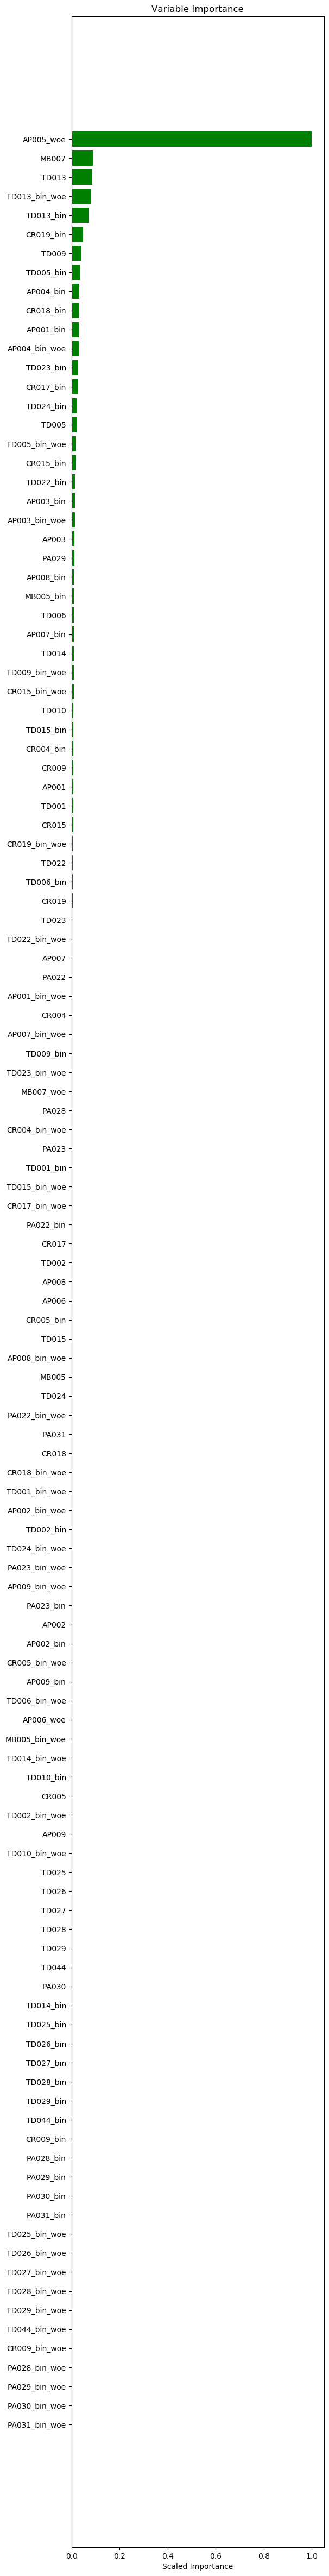

In [239]:
def VarImp(model_name):
    
    from sklearn.metrics import roc_curve,auc
    from sklearn.metrics import average_precision_score
    from sklearn.metrics import precision_recall_curve
    import matplotlib.pyplot as plt
    
    # plot the variable importance
    plt.rcdefaults()
    variables = model_name._model_json['output']['variable_importances']['variable']
    y_pos = np.arange(len(variables))
    fig, ax = plt.subplots(figsize = (6,len(variables)/2))
    scaled_importance = model_name._model_json['output']['variable_importances']['scaled_importance']
    ax.barh(y_pos,scaled_importance,align='center',color='green')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(variables)
    ax.invert_yaxis()
    ax.set_xlabel('Scaled Importance')
    ax.set_title('Variable Importance')
    plt.show()
    
VarImp(rf_v1)

In [197]:
predictions = rf_v1.predict(test_hex)
predictions.head()
test_scores = test_hex['loan_default'].cbind(predictions).as_data_frame()
test_scores.head()

drf prediction progress: | (failed)


OSError: Job with key $03017f00000132d4ffffffff$_a4d62871ed6ac1a775f1e15e608e4656 failed with an exception: java.lang.IllegalArgumentException: Test/Validation dataset has categorical column 'AP005_woe' which is real-valued in the training data
stacktrace: 
java.lang.IllegalArgumentException: Test/Validation dataset has categorical column 'AP005_woe' which is real-valued in the training data
	at hex.Model.adaptTestForTrain(Model.java:1788)
	at hex.Model.adaptTestForTrain(Model.java:1598)
	at hex.Model.adaptTestForTrain(Model.java:1594)
	at hex.Model.adaptFrameForScore(Model.java:1931)
	at hex.Model.score(Model.java:1949)
	at water.api.ModelMetricsHandler$1.compute2(ModelMetricsHandler.java:516)
	at water.H2O$H2OCountedCompleter.compute(H2O.java:1689)
	at jsr166y.CountedCompleter.exec(CountedCompleter.java:468)
	at jsr166y.ForkJoinTask.doExec(ForkJoinTask.java:263)
	at jsr166y.ForkJoinPool$WorkQueue.runTask(ForkJoinPool.java:976)
	at jsr166y.ForkJoinPool.runWorker(ForkJoinPool.java:1479)
	at jsr166y.ForkJoinWorkerThread.run(ForkJoinWorkerThread.java:104)


In [198]:
def createGains(model):
    predictions = model.predict(test_hex)
    test_scores = test_hex['loan_default'].cbind(predictions).as_data_frame()

    #sort on prediction (descending), add id, and decile for groups containing 1/10 of datapoints
    test_scores = test_scores.sort_values(by='predict',ascending=False)
    test_scores['row_id'] = range(0,0+len(test_scores))
    test_scores['decile'] = ( test_scores['row_id'] / (len(test_scores)/10) ).astype(int)
    #see count by decile
    test_scores.loc[test_scores['decile'] == 10]=9
    test_scores['decile'].value_counts()

    #create gains table
    gains = test_scores.groupby('decile')['loan_default'].agg(['count','sum'])
    gains.columns = ['count','actual']
    gains

    #add features to gains table
    gains['non_actual'] = gains['count'] - gains['actual']
    gains['cum_count'] = gains['count'].cumsum()
    gains['cum_actual'] = gains['actual'].cumsum()
    gains['cum_non_actual'] = gains['non_actual'].cumsum()
    gains['percent_cum_actual'] = (gains['cum_actual'] / np.max(gains['cum_actual'])).round(2)
    gains['percent_cum_non_actual'] = (gains['cum_non_actual'] / np.max(gains['cum_non_actual'])).round(2)
    gains['if_random'] = np.max(gains['cum_actual']) /10 
    gains['if_random'] = gains['if_random'].cumsum()
    gains['lift'] = (gains['cum_actual'] / gains['if_random']).round(2)
    gains['K_S'] = np.abs( gains['percent_cum_actual'] -  gains['percent_cum_non_actual'] ) * 100
    gains['gain']=(gains['cum_actual']/gains['cum_count']*100).round(2)
    gains = pd.DataFrame(gains)
    return(gains)

createGains(rf_v1)

drf prediction progress: | (failed)


OSError: Job with key $03017f00000132d4ffffffff$_9bf1e185fa861920af983f541e5c4443 failed with an exception: java.lang.IllegalArgumentException: Test/Validation dataset has categorical column 'AP005_woe' which is real-valued in the training data
stacktrace: 
java.lang.IllegalArgumentException: Test/Validation dataset has categorical column 'AP005_woe' which is real-valued in the training data
	at hex.Model.adaptTestForTrain(Model.java:1788)
	at hex.Model.adaptTestForTrain(Model.java:1598)
	at hex.Model.adaptTestForTrain(Model.java:1594)
	at hex.Model.adaptFrameForScore(Model.java:1931)
	at hex.Model.score(Model.java:1949)
	at water.api.ModelMetricsHandler$1.compute2(ModelMetricsHandler.java:516)
	at water.H2O$H2OCountedCompleter.compute(H2O.java:1689)
	at jsr166y.CountedCompleter.exec(CountedCompleter.java:468)
	at jsr166y.ForkJoinTask.doExec(ForkJoinTask.java:263)
	at jsr166y.ForkJoinPool$WorkQueue.runTask(ForkJoinPool.java:976)
	at jsr166y.ForkJoinPool.runWorker(ForkJoinPool.java:1479)
	at jsr166y.ForkJoinWorkerThread.run(ForkJoinWorkerThread.java:104)


In [199]:
def ROC_AUC(my_result,df,target):
    from sklearn.metrics import roc_curve,auc
    from sklearn.metrics import average_precision_score
    from sklearn.metrics import precision_recall_curve
    import matplotlib.pyplot as plt

    # ROC
    y_actual = df[target].as_data_frame()
    y_pred = my_result.predict(df).as_data_frame()
    fpr = list()
    tpr = list()
    roc_auc = list()
    fpr,tpr,_ = roc_curve(y_actual,y_pred)
    roc_auc = auc(fpr,tpr)
    
    # Precision-Recall
    average_precision = average_precision_score(y_actual,y_pred)

    print('')
    print('   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate')
    print('')
    print('	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy')
    print('')
    print('   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)')
    print('')
    
    # plotting
    plt.figure(figsize=(10,4))

    # ROC
    plt.subplot(1,2,1)
    plt.plot(fpr,tpr,color='darkorange',lw=2,label='ROC curve (aare=%0.2f)' % roc_auc)
    plt.plot([0,1],[0,1],color='navy',lw=3,linestyle='--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic: AUC={0:0.4f}'.format(roc_auc))
    plt.legend(loc='lower right')

    # Precision-Recall
    plt.subplot(1,2,2)
    precision,recall,_ = precision_recall_curve(y_actual,y_pred)
    plt.step(recall,precision,color='b',alpha=0.2,where='post')
    plt.fill_between(recall,precision,step='post',alpha=0.2,color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0,1.05])
    plt.xlim([0.0,1.0])
    plt.title('Precision-Recall curve: PR={0:0.4f}'.format(average_precision))
    plt.show()

In [200]:
ROC_AUC(rf_v1,test_hex,'loan_default')

drf prediction progress: | (failed)


OSError: Job with key $03017f00000132d4ffffffff$_a30be3529877c5f1d0880981318c4b6c failed with an exception: java.lang.IllegalArgumentException: Test/Validation dataset has categorical column 'AP005_woe' which is real-valued in the training data
stacktrace: 
java.lang.IllegalArgumentException: Test/Validation dataset has categorical column 'AP005_woe' which is real-valued in the training data
	at hex.Model.adaptTestForTrain(Model.java:1788)
	at hex.Model.adaptTestForTrain(Model.java:1598)
	at hex.Model.adaptTestForTrain(Model.java:1594)
	at hex.Model.adaptFrameForScore(Model.java:1931)
	at hex.Model.score(Model.java:1949)
	at water.api.ModelMetricsHandler$1.compute2(ModelMetricsHandler.java:516)
	at water.H2O$H2OCountedCompleter.compute(H2O.java:1689)
	at jsr166y.CountedCompleter.exec(CountedCompleter.java:468)
	at jsr166y.ForkJoinTask.doExec(ForkJoinTask.java:263)
	at jsr166y.ForkJoinPool$WorkQueue.runTask(ForkJoinPool.java:976)
	at jsr166y.ForkJoinPool.runWorker(ForkJoinPool.java:1479)
	at jsr166y.ForkJoinWorkerThread.run(ForkJoinWorkerThread.java:104)


### Now the code works fine with the small dataset, we can model with the entire dataset

In [38]:
rf_v2 = H2ORandomForestEstimator(
        model_id = 'rf_v2',
        ntrees = 300,
        nfolds=10,
        min_rows=100,
        seed=1234)
rf_v2.train(predictors,target,training_frame=train_hex)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [39]:
createGains(rf_v2)

drf prediction progress: |████████████████████████████████████████████████| 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,320,99,221,320,99,221,0.16,0.08,60.0,1.65,8.0,30.94
1,320,92,228,640,191,449,0.32,0.17,120.0,1.59,15.0,29.84
2,320,77,243,960,268,692,0.45,0.27,180.0,1.49,18.0,27.92
3,320,60,260,1280,328,952,0.55,0.37,240.0,1.37,18.0,25.62
4,320,64,256,1600,392,1208,0.65,0.46,300.0,1.31,19.0,24.50
5,320,53,267,1920,445,1475,0.74,0.57,360.0,1.24,17.0,23.18
6,320,40,280,2240,485,1755,0.81,0.68,420.0,1.15,13.0,21.65
7,320,57,263,2560,542,2018,0.90,0.78,480.0,1.13,12.0,21.17
8,320,34,286,2880,576,2304,0.96,0.89,540.0,1.07,7.0,20.00


### Learning objective 4: 10-fold Cross Validation
<img src="https://ethen8181.github.io/machine-learning/model_selection/img/kfolds.png">

### Learning objective 4: Use H2O's "balance_classes"
* The balance_classes option can be used to balance the class distribution. When enabled, H2O will either undersample the majority classes or oversample the minority classes. 
* Note that the resulting model will also correct the final probabilities (“undo the sampling”) using a monotonic transform, so the predicted probabilities of the first model will differ from a second model. However, because AUC only cares about ordering, it won’t be affected.
* See [this H2O page](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/algo-params/balance_classes.html).

In [40]:
rf_v3 = H2ORandomForestEstimator(
        model_id = 'rf_v3',
        ntrees = 300,
        nfolds=10,
        min_rows=100,
        balance_classes = True,
        seed=1234)
rf_v3.train(predictors,target,training_frame=train_hex)

drf Model Build progress: |███████████████████████████████████████████████| 100%


drf prediction progress: |████████████████████████████████████████████████| 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



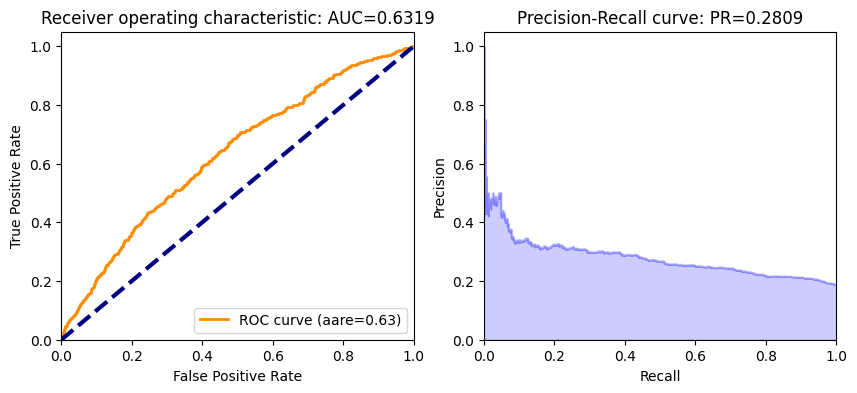

In [42]:
ROC_AUC(rf_v3,test_hex,'loan_default')

In [41]:
createGains(rf_v3)

drf prediction progress: |████████████████████████████████████████████████| 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,320,99,221,320,99,221,0.16,0.08,60.0,1.65,8.0,30.94
1,320,92,228,640,191,449,0.32,0.17,120.0,1.59,15.0,29.84
2,320,77,243,960,268,692,0.45,0.27,180.0,1.49,18.0,27.92
3,320,60,260,1280,328,952,0.55,0.37,240.0,1.37,18.0,25.62
4,320,64,256,1600,392,1208,0.65,0.46,300.0,1.31,19.0,24.50
5,320,53,267,1920,445,1475,0.74,0.57,360.0,1.24,17.0,23.18
6,320,40,280,2240,485,1755,0.81,0.68,420.0,1.15,13.0,21.65
7,320,57,263,2560,542,2018,0.90,0.78,480.0,1.13,12.0,21.17
8,320,34,286,2880,576,2304,0.96,0.89,540.0,1.07,7.0,20.00


### Learning objective 5: Undersampling
* [Using Under-Sampling Techniques for Extremely Imbalanced Data](https://towardsdatascience.com/sampling-techniques-for-extremely-imbalanced-data-part-i-under-sampling-a8dbc3d8d6d8)
* [imblearn](https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.datasets.make_imbalance.html)

In [145]:
y = data[target]
X = data.drop(target,axis=1)
y.dtypes

dtype('int64')

In [146]:
y1_cnt = data[target].sum()
y1_cnt

15488

In [147]:
N = 2
y0_cnt = y1_cnt * N
y0_cnt

30976

In [49]:
pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.7.0-py3-none-any.whl (167 kB)
Note: you may need to restart the kernel to use updated packages.


In [134]:
from imblearn.datasets import make_imbalance
X_rs, y_rs = make_imbalance(X, y, 
                            sampling_strategy={1:y1_cnt , 0:  y0_cnt},
                            random_state=0)
X_rs = pd.DataFrame(X_rs)
y_rs = pd.DataFrame(y_rs)    

In [153]:
y_rs = data[data[target]==1]
X_rs = data[data[target]==0].sample(n=y0_cnt)
smpl = pd.concat([X_rs,y_rs])
smpl_hex = h2o.H2OFrame(smpl)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [154]:
rf_v4 = H2ORandomForestEstimator(
        model_id = 'rf_v4',
        ntrees = 300,
        nfolds=10,
        min_rows=100,
        seed=1234)
rf_v4.train(predictors,target,training_frame=smpl_hex)

drf Model Build progress: |███████████████████████████████████████████████| 100%


drf prediction progress: |████████████████████████████████████████████████| 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



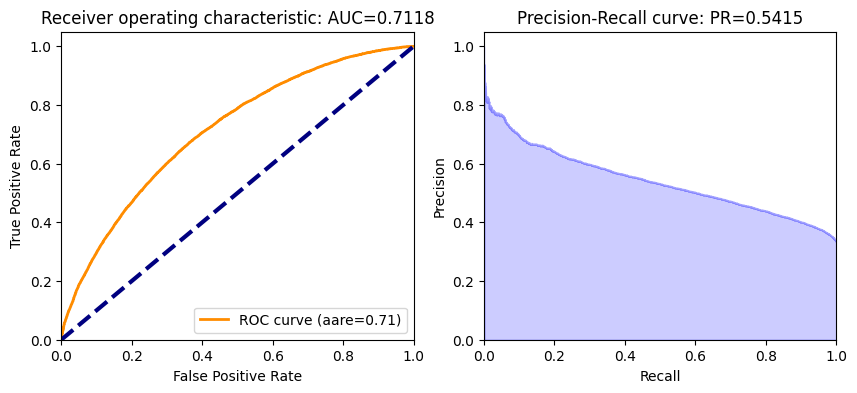

In [155]:
ROC_AUC(rf_v4,smpl_hex,'loan_default')

drf prediction progress: |████████████████████████████████████████████████| 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



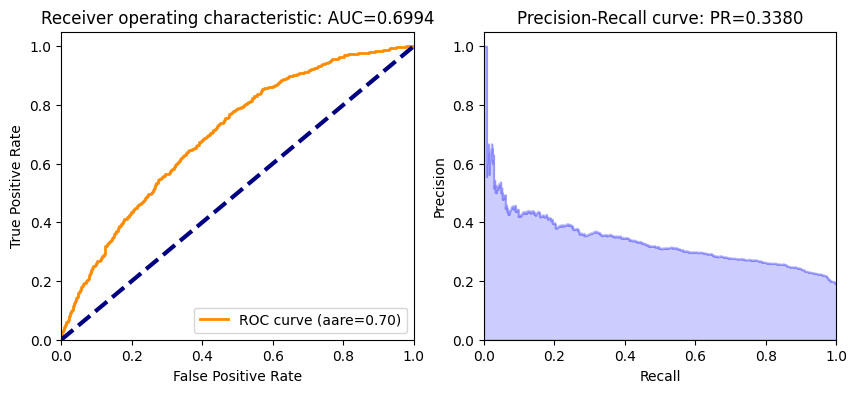

In [156]:
ROC_AUC(rf_v4,test_hex,'loan_default')

In [157]:
createGains(rf_v4)

drf prediction progress: |████████████████████████████████████████████████| 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,320,122,198,320,122,198,0.20,0.08,60.0,2.03,12.0,38.12
1,320,103,217,640,225,415,0.38,0.16,120.0,1.88,22.0,35.16
2,320,73,247,960,298,662,0.50,0.25,180.0,1.66,25.0,31.04
3,320,78,242,1280,376,904,0.63,0.35,240.0,1.57,28.0,29.38
4,320,64,256,1600,440,1160,0.73,0.45,300.0,1.47,28.0,27.50
5,320,57,263,1920,497,1423,0.83,0.55,360.0,1.38,28.0,25.89
6,320,43,277,2240,540,1700,0.90,0.65,420.0,1.29,25.0,24.11
7,320,30,290,2560,570,1990,0.95,0.77,480.0,1.19,18.0,22.27
8,320,18,302,2880,588,2292,0.98,0.88,540.0,1.09,10.0,20.42


### GBM

In [30]:
gbm_v1 = H2OGradientBoostingEstimator(
        model_id = 'gbm_v1',
        seed=1234)
gbm_v1.train(predictors,target,training_frame=train_hex)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


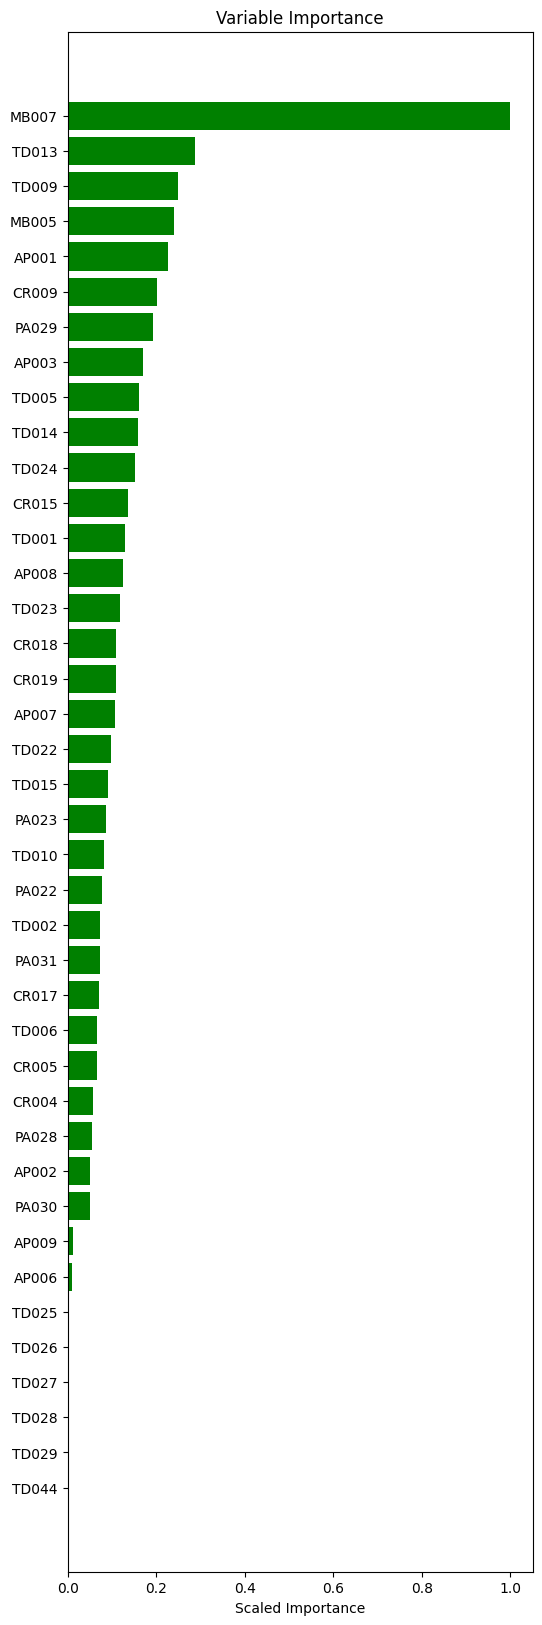

In [34]:
VarImp(gbm_v1)

In [35]:
createGains(gbm_v1)

gbm prediction progress: |████████████████████████████████████████████████| 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,320,95,225,320,95,225,0.16,0.09,60.0,1.58,7.0,29.69
1,320,82,238,640,177,463,0.30,0.18,120.0,1.48,12.0,27.66
2,320,67,253,960,244,716,0.41,0.28,180.0,1.36,13.0,25.42
3,320,67,253,1280,311,969,0.52,0.37,240.0,1.30,15.0,24.30
4,320,64,256,1600,375,1225,0.62,0.47,300.0,1.25,15.0,23.44
5,320,59,261,1920,434,1486,0.72,0.57,360.0,1.21,15.0,22.60
6,320,57,263,2240,491,1749,0.82,0.67,420.0,1.17,15.0,21.92
7,320,45,275,2560,536,2024,0.89,0.78,480.0,1.12,11.0,20.94
8,320,27,293,2880,563,2317,0.94,0.89,540.0,1.04,5.0,19.55


gbm prediction progress: |████████████████████████████████████████████████| 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



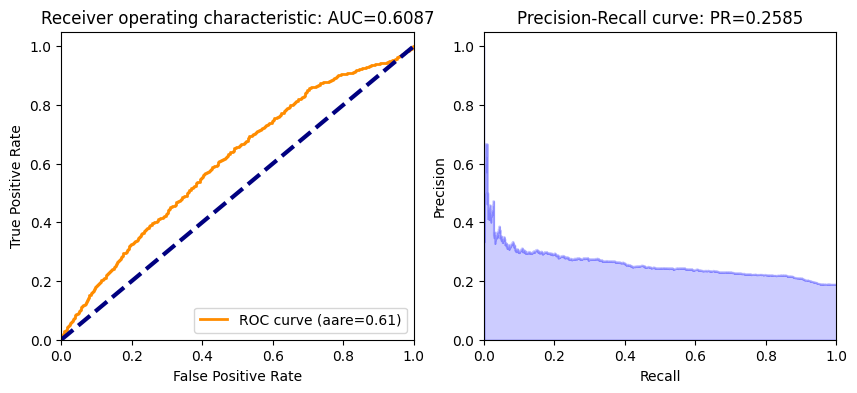

In [36]:
ROC_AUC(gbm_v1,test_hex,'loan_default')